In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn.metrics as metrics
from sklearn.preprocessing import label_binarize

In [3]:
with open("../IFCNetCore_Classes.json", "r") as f:
    class_names = json.load(f)

In [4]:
mvcnn_data = np.load("MVCNNProbs.npz")
mvcnn_labels, mvcnn_probs = mvcnn_data["labels"], mvcnn_data["probs"]
mvcnn_binary_labels = label_binarize(mvcnn_labels, classes=list(range(len(class_names))))
mvcnn_precision, mvcnn_recall, _ = metrics.precision_recall_curve(mvcnn_binary_labels.ravel(), mvcnn_probs.ravel())
mvcnn_auc = metrics.auc(mvcnn_recall, mvcnn_precision)

In [5]:
dgcnn_data = np.load("DGCNNProbs.npz")
dgcnn_labels, dgcnn_probs = dgcnn_data["labels"], dgcnn_data["probs"]
dgcnn_binary_labels = label_binarize(dgcnn_labels, classes=list(range(len(class_names))))
dgcnn_precision, dgcnn_recall, _ = metrics.precision_recall_curve(dgcnn_binary_labels.ravel(), dgcnn_probs.ravel())
dgcnn_auc = metrics.auc(dgcnn_recall, dgcnn_precision)

In [6]:
meshnet_data = np.load("MeshNetProbs.npz")
meshnet_labels, meshnet_probs = meshnet_data["labels"], meshnet_data["probs"]
meshnet_binary_labels = label_binarize(meshnet_labels, classes=list(range(len(class_names))))
meshnet_precision, meshnet_recall, _ = metrics.precision_recall_curve(meshnet_binary_labels.ravel(),
                                                                      meshnet_probs.ravel())
meshnet_auc = metrics.auc(meshnet_recall, meshnet_precision)

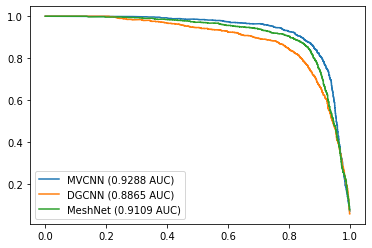

In [7]:
plt.plot(mvcnn_recall, mvcnn_precision, label=f"MVCNN ({mvcnn_auc:.4f} AUC)")
plt.plot(dgcnn_recall, dgcnn_precision, label=f"DGCNN ({dgcnn_auc:.4f} AUC)")
plt.plot(meshnet_recall, meshnet_precision, label=f"MeshNet ({meshnet_auc:.4f} AUC)")
plt.legend()
plt.savefig("../reports/figures/pr_curve_all.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
def plot_class_pr_curves(meshnet_data, dgcnn_data, mvcnn_data, class_names, classes_to_plot, rows, cols):
    plt.figure(figsize=(12, 7))
    data = {"MVCNN": mvcnn_data, "DGCNN": dgcnn_data, "MeshNet": meshnet_data}
    
    plt.subplot(rows, cols, 1)
    plt.title("Overall")
    plt.plot(mvcnn_recall, mvcnn_precision, label=f"MVCNN ({mvcnn_auc:.4f} AUC)")
    plt.plot(dgcnn_recall, dgcnn_precision, label=f"DGCNN ({dgcnn_auc:.4f} AUC)")
    plt.plot(meshnet_recall, meshnet_precision, label=f"MeshNet ({meshnet_auc:.4f} AUC)")
    plt.legend(loc="lower left")
    
    plot_count = 2
    for i, class_name in enumerate(class_names):
        if class_name not in classes_to_plot: continue
        plt.subplot(rows, cols, plot_count)
        plt.title(class_name)
        for model_name, model_data in data.items():
            labels, probs = model_data["labels"], model_data["probs"]
            precision, recall, thresholds = metrics.precision_recall_curve(labels, probs[:, i], pos_label=i)
            auc = metrics.auc(recall, precision)
            plt.plot(recall, precision, label=f"{model_name} ({auc:.4f} AUC)")
        plot_count += 1
        plt.legend(loc="lower left")
    plt.savefig("../reports/figures/class_pr_curves.png", dpi=300, bbox_inches="tight")
    plt.show()

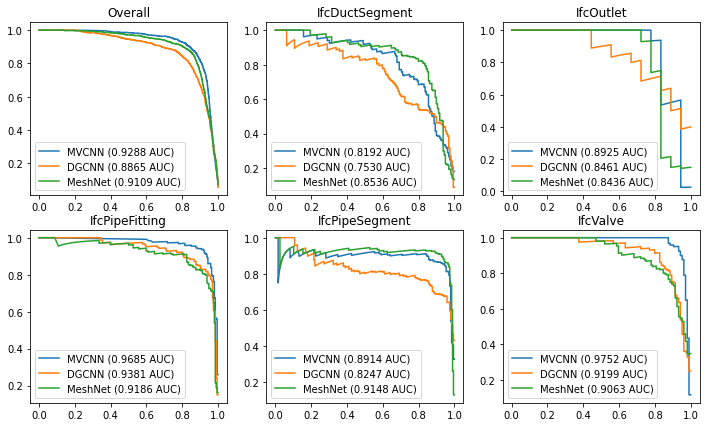

In [9]:
classes_to_plot = ["IfcDuctSegment", "IfcPipeFitting", "IfcPipeSegment", "IfcOutlet", "IfcValve"]
plot_class_pr_curves(meshnet_data, dgcnn_data, mvcnn_data, class_names, classes_to_plot, 2, 3)

In [10]:
def plot_model_pr_curves(labels, probs, class_names, classes_to_plot, fname):
    for i, class_name in enumerate(class_names):
        if class_name not in classes_to_plot: continue
        precision, recall, thresholds = metrics.precision_recall_curve(labels, probs[:, i], pos_label=i)
        auc = metrics.auc(recall, precision)
        plt.plot(recall, precision, label=f"{class_name} ({auc:.4f} AUC)")
    plt.legend()
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    if fname:
        plt.savefig("../reports/figures/" + fname, dpi=300, bbox_inches="tight")
    plt.show()

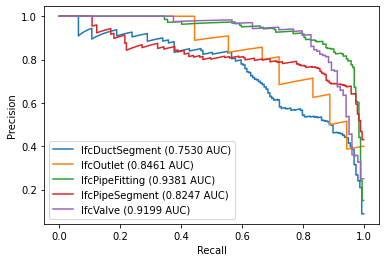

In [11]:
plot_model_pr_curves(dgcnn_labels, dgcnn_probs, class_names, classes_to_plot, fname="dgcnn_pr_curves.png")

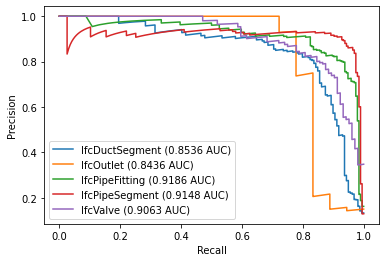

In [12]:
plot_model_pr_curves(meshnet_labels, meshnet_probs, class_names, classes_to_plot, fname="meshnet_pr_curves.png")

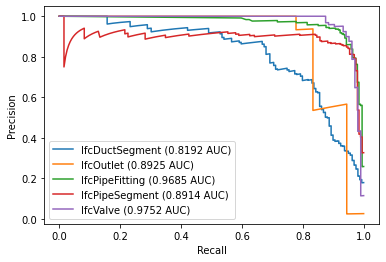

In [13]:
plot_model_pr_curves(mvcnn_labels, mvcnn_probs, class_names, classes_to_plot, fname="mvcnn_pr_curves.png")